# Game Sales Project 

This project features sales data for video games from 1980 to 2016. We will analyze the data to uncover insights into the best selling video game products. We will compare the different platforms over the years to determine which platforms performed best and about how long a single platform stays relevent before being replaced. We will look at which genres of games are most succesful and whether or not critic or user scores have any correlation with the sales of a game. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import statistics as st 
import seaborn as sns
from scipy import stats

In [ ]:
games=pd.read_csv('/datasets/games.csv')
print (games.head(10))
print('\n')
print(games.info())
print('\n')
print(games.isnull().sum())
print('\n')
print(games.isnull().sum()/len(games))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

There are some issues with the data. First i will convert all columns and values to lowercase to make it easier to process the data later. I will also fill nan values in the sales fields with 0 to make later calculations easier. Values in these fields may be missing because some games might not have sold in all regions. I will leave user and critic score nan values in place because these nan values could be because no data was available for those games, especially for older games. filling with 0 could skew the later calculations. 

In [ ]:
games.columns = games.columns.str.lower()
games[['name', 'platform', 'genre', 'rating']] = games[['name', 'platform', 'genre', 'rating']].apply(lambda x: x.str.lower())
games['year_of_release'] = games['year_of_release'].dropna().astype(int)
games[['jp_sales', 'na_sales', 'eu_sales', 'other_sales']] = games[['jp_sales', 'na_sales', 'eu_sales', 'other_sales']].fillna(0)

print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      e  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      e  
3     10.93      3.28         2.95          80.0          8      e  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

cols = list(games.columns)

index = cols.index('other_sales') + 1
cols.insert(index, cols.pop(cols.index('total_sales')))

games = games[cols]


In [ ]:
games_grouped = games.groupby('year_of_release').sum().sort_values(by='year_of_release', ascending=True)

print(games_grouped)

                 na_sales  eu_sales  jp_sales  other_sales  total_sales  \
year_of_release                                                           
1980.0              10.59      0.67      0.00         0.12        11.38   
1981.0              33.40      1.96      0.00         0.32        35.68   
1982.0              26.92      1.65      0.00         0.31        28.88   
1983.0               7.76      0.80      8.10         0.14        16.80   
1984.0              33.28      2.10     14.27         0.70        50.35   
1985.0              33.73      4.74     14.56         0.92        53.95   
1986.0              12.50      2.84     19.81         1.93        37.08   
1987.0               8.46      1.41     11.63         0.20        21.70   
1988.0              23.87      6.59     15.76         0.99        47.21   
1989.0              45.15      8.44     18.36         1.50        73.45   
1990.0              25.46      7.63     14.88         1.40        49.37   
1991.0              12.76

It seems the most amount of games were released in the years 2000-2010, with numbers peaking in 2010 and beginning to decline. For our next calculations we will islolate these years since they were the most productive years for the gaming industry. 

    year_of_release  game_count
36           1980.0           9
24           1981.0          46
27           1982.0          36
30           1983.0          17
34           1984.0          14
35           1985.0          14
28           1986.0          21
31           1987.0          16
33           1988.0          15
29           1989.0          17
32           1990.0          16
26           1991.0          41
25           1992.0          43
23           1993.0          62
22           1994.0         121
21           1995.0         219
20           1996.0         263
19           1997.0         289
16           1998.0         379
18           1999.0         338
17           2000.0         350
15           2001.0         482
7            2002.0         829
8            2003.0         775
9            2004.0         762
6            2005.0         939
5            2006.0        1006
3            2007.0        1197
0            2008.0        1427
1            2009.0        1426
2       

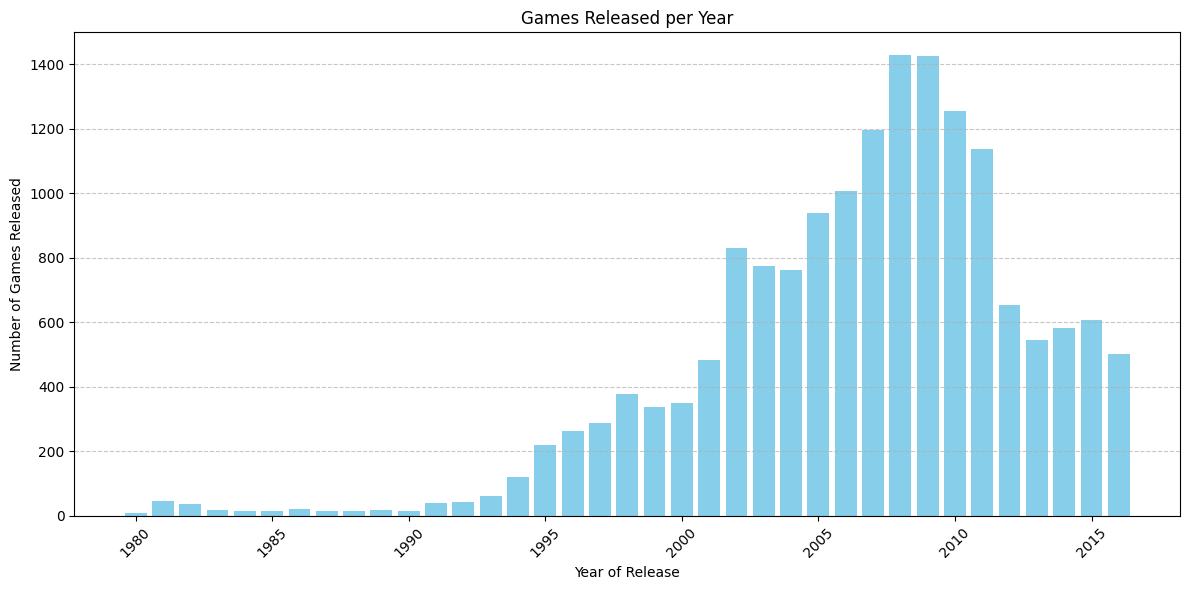

In [ ]:
games_per_year = games['year_of_release'].value_counts().reset_index()
games_per_year.columns = ['year_of_release', 'game_count']
games_per_year = games_per_year.sort_values(by='year_of_release', ascending=True)

print(games_per_year)

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(games_per_year["year_of_release"], games_per_year["game_count"], color="skyblue")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games Released")
plt.title("Games Released per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


ps2 was clearly the platform with the most overall game sales. 

In [ ]:
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

print(platform_sales)

   platform  total_sales
16      ps2      1255.77
28     x360       971.42
17      ps3       939.65
25      wii       907.51
4        ds       806.12
15       ps       730.86
6       gba       317.85
18      ps4       314.14
19      psp       294.05
13       pc       259.52
2       3ds       259.00
29       xb       257.74
5        gb       255.46
11      nes       251.05
10      n64       218.68
23     snes       200.04
7        gc       198.93
30     xone       159.32
0      2600        96.98
26     wiiu        82.19
20      psv        54.07
21      sat        33.59
8       gen        30.77
3        dc        15.95
22      scd         1.86
12       ng         1.44
27       ws         1.42
24     tg16         0.16
1       3do         0.10
9        gg         0.04
14     pcfx         0.03


We can see from the chart below that 2004 was the most lucrative year for ps2 games. 

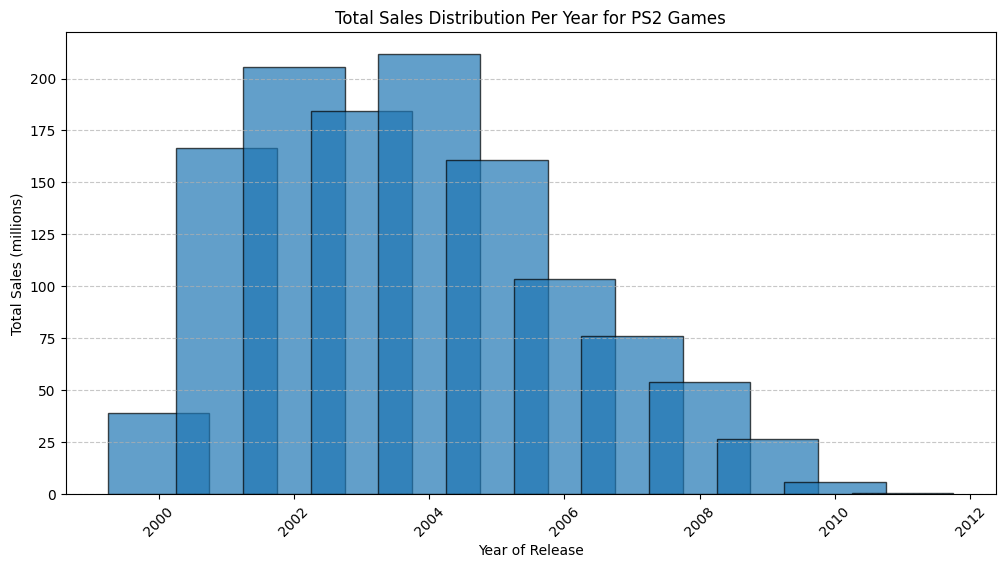

In [ ]:
import matplotlib.pyplot as plt

ps2_games = games[games['platform'].str.lower() == 'ps2']

ps2_sales_per_year = ps2_games.groupby('year_of_release')['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(ps2_sales_per_year['year_of_release'], ps2_sales_per_year['total_sales'], width=1.5, edgecolor='black', alpha=0.7)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales Distribution Per Year for PS2 Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
grouped_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

print(grouped_sales)

    platform  year_of_release  total_sales
0       2600           1980.0        11.38
1       2600           1981.0        35.68
2       2600           1982.0        28.88
3       2600           1983.0         5.84
4       2600           1984.0         0.27
..       ...              ...          ...
233       xb           2008.0         0.18
234     xone           2013.0        18.96
235     xone           2014.0        54.07
236     xone           2015.0        60.14
237     xone           2016.0        26.15

[238 rows x 3 columns]


In [ ]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)


pivoted_df = grouped_sales.pivot(
    index='platform', 
    columns='year_of_release', 
    values='total_sales'
)

pivoted_df



year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
gb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,NaN,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.33,12.64,3.07,8.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the on average, the life cycle of a console is around 8 to 10 years, after which sales sharply decline as they are either phased out or replaced by newer updated models. 

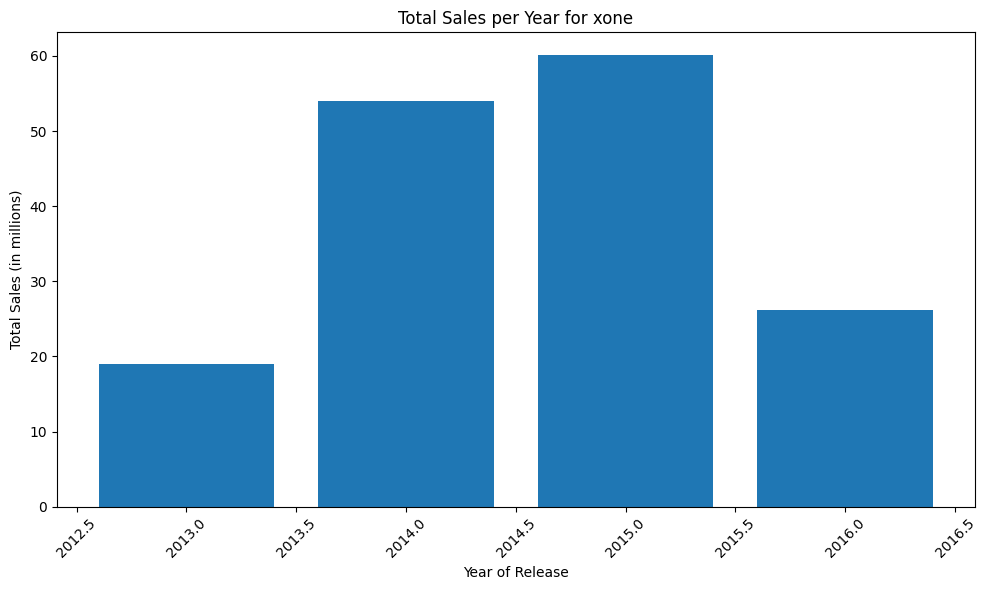

In [ ]:
%matplotlib inline
   
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
   
platforms = grouped_sales['platform'].unique()
    
for platform in platforms: clear_output(wait=True)  # Clear the output to avoid stacking
platform_data = grouped_sales[grouped_sales['platform'] == platform]

plt.figure(figsize=(10, 6))
plt.bar(platform_data['year_of_release'], platform_data['total_sales'], width=0.8)
plt.title(f'Total Sales per Year for {platform}')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   

In [ ]:
filtered_games = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

filtered_games['total_sales'] = (
    filtered_games['na_sales'] + 
    filtered_games['eu_sales'] + 
    filtered_games['jp_sales'] + 
    filtered_games['other_sales']
)

avg_sales_per_platform = filtered_games.groupby('platform')['total_sales'].mean()

print(avg_sales_per_platform)

platform
3ds     0.472772
ds      0.192500
pc      0.208624
ps3     0.525884
ps4     0.801378
psp     0.052239
psv     0.092151
wii     0.593913
wiiu    0.562000
x360    0.735484
xone    0.645020
Name: total_sales, dtype: float64


/tmp/ipykernel_50/2239218840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['total_sales'] = (


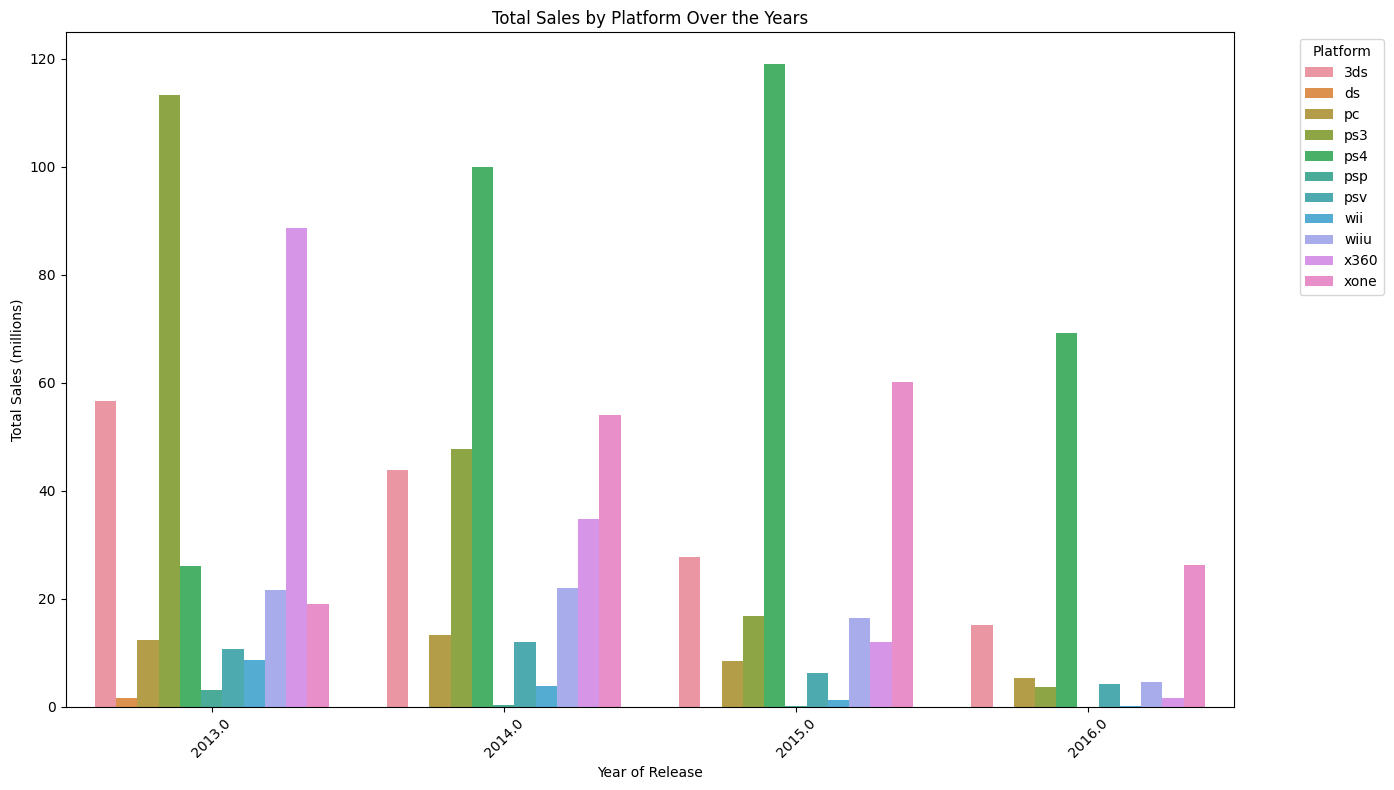

In [ ]:
sales_platform_year = filtered_games.groupby(['year_of_release', 'platform'], as_index=False)['total_sales'].sum()

plt.figure(figsize=(14,8))

sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=sales_platform_year)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Platform Over the Years')
plt.xticks(rotation=45)

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


We can see from the scatter plots below that there is a clear positive correlation between between critic and user scores and total sales of a game. 

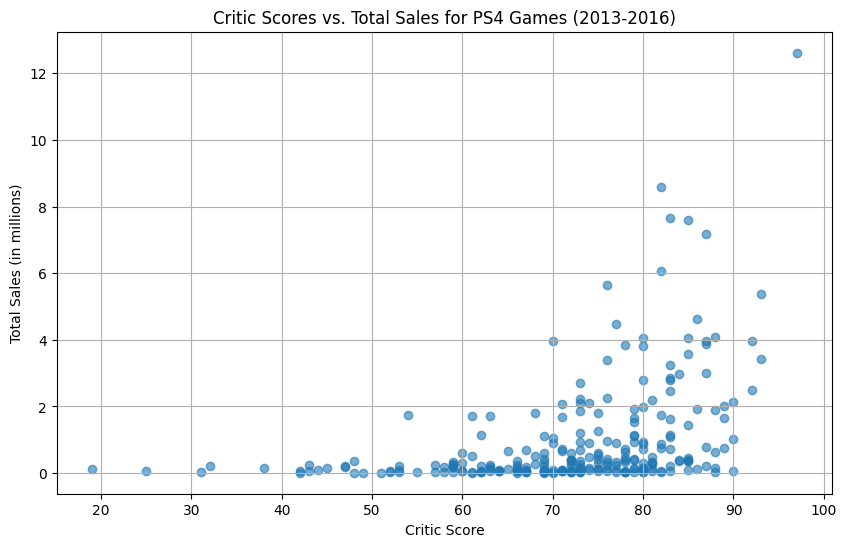

In [ ]:
import matplotlib.pyplot as plt

ps4_games = filtered_games[filtered_games['platform'] == 'ps4'].copy()

ps4_games = ps4_games.dropna(subset=['critic_score'])

plt.figure(figsize=(10, 6))
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha=0.6)

plt.xlabel("Critic Score")
plt.ylabel("Total Sales (in millions)")
plt.title("Critic Scores vs. Total Sales for PS4 Games (2013-2016)")
plt.grid(True)

plt.show()


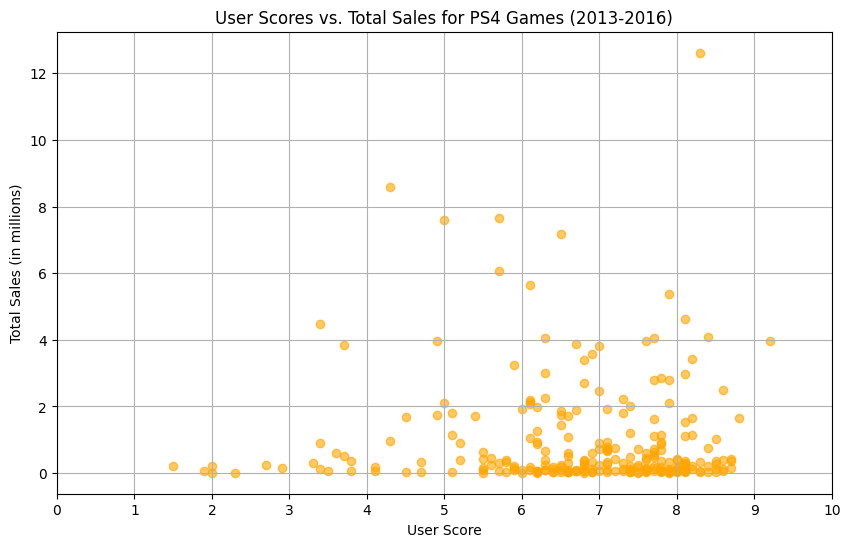

In [ ]:
ps4_games = ps4_games.dropna(subset=['user_score'])
ps4_games['user_score'] = pd.to_numeric(ps4_games['user_score'], errors='coerce')

ps4_games = ps4_games[(ps4_games['user_score'] >= 0) & (ps4_games['user_score'] <= 10)]

plt.figure(figsize=(10, 6))
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha=0.6, color='orange')

plt.xlabel("User Score")
plt.ylabel("Total Sales (in millions)")
plt.title("User Scores vs. Total Sales for PS4 Games (2013-2016)")
plt.xticks(range(0, 11)) 
plt.grid(True)

plt.show()

Our analysis of the same games on different platforms reveals that when games are available on multiple platforms, ps2 is often the version of the game that sells the most. This fits into our previous insights that ps2 is the most popular platform. 

In [ ]:
game_counts = filtered_games['name'].value_counts()
multi_platform_games = game_counts[game_counts > 1].index  

multi_platform_sales = filtered_games[filtered_games['name'].isin(multi_platform_games)]

multi_platform_sales = multi_platform_sales.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

print(multi_platform_sales)


                                                   name platform  total_sales
0                                  frozen: olaf's quest      3ds         0.59
1                                  frozen: olaf's quest       ds         0.51
2                            2014 fifa world cup brazil      ps3         0.61
3                            2014 fifa world cup brazil     x360         0.43
4                     3rd super robot wars z jigoku hen      ps3         0.23
5                     3rd super robot wars z jigoku hen      psv         0.19
6                   3rd super robot wars z: tengoku-hen      ps3         0.15
7                   3rd super robot wars z: tengoku-hen      psv         0.19
8                                         7 days to die      ps4         0.14
9                                         7 days to die     xone         0.05
10                       accel world: kasoku no chouten      ps3         0.02
11                       accel world: kasoku no chouten      psp

In [ ]:
platform_sales = filtered_games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales_sorted = platform_sales.sort_values(by='total_sales', ascending=False)

print(platform_sales_sorted)

   platform  total_sales
4       ps4       314.14
3       ps3       181.43
10     xone       159.32
0       3ds       143.25
9      x360       136.80
8      wiiu        64.63
2        pc        39.43
6       psv        32.99
7       wii        13.66
5       psp         3.50
1        ds         1.54


We can see that while ds is most popular in japan, ps2 is most popular in na and eu. 

In [ ]:
region_sales_platform = filtered_games.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales']].sum()

top_5_na_platforms = region_sales_platform.nlargest(5, 'na_sales').reset_index()
top_5_jp_platforms = region_sales_platform.nlargest(5, 'jp_sales').reset_index()
top_5_eu_platforms = region_sales_platform.nlargest(5, 'eu_sales').reset_index()

print('top 5 na platforms')
print(top_5_na_platforms)
print('\n')

print('top 5 jp plfatforms')
print(top_5_jp_platforms)
print('\n')

print('top 5 eu platforms')
print(top_5_eu_platforms)


top 5 na platforms
  platform  na_sales  jp_sales  eu_sales
0      ps4    108.74     15.96    141.09
1     xone     93.12      0.34     51.59
2     x360     81.66      0.51     42.52
3      ps3     63.50     23.35     67.81
4      3ds     38.20     67.81     30.96


top 5 jp plfatforms
  platform  na_sales  jp_sales  eu_sales
0      3ds     38.20     67.81     30.96
1      ps3     63.50     23.35     67.81
2      psv      5.04     18.59      6.10
3      ps4    108.74     15.96    141.09
4     wiiu     29.21     10.88     19.85


top 5 eu platforms
  platform  na_sales  jp_sales  eu_sales
0      ps4    108.74     15.96    141.09
1      ps3     63.50     23.35     67.81
2     xone     93.12      0.34     51.59
3     x360     81.66      0.51     42.52
4      3ds     38.20     67.81     30.96


In [ ]:
genre_sales = filtered_games.groupby('genre')['total_sales'].agg(['sum', 'mean']).reset_index()

genre_sales.columns = ['genre', 'total_sales', 'average_sales']

genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

print(genre_sales)


           genre  total_sales  average_sales
0         action       321.87       0.420196
8        shooter       232.98       1.245882
10        sports       150.65       0.703972
7   role-playing       145.89       0.499623
3           misc        62.82       0.405290
4       platform        42.63       0.576081
6         racing        39.89       0.469294
2       fighting        35.31       0.441375
1      adventure        23.64       0.096490
9     simulation        21.76       0.350968
11      strategy        10.08       0.180000
5         puzzle         3.17       0.186471


We see that while role playing games are most popular in japan, action games are more popular in na and eu. We can also see that sports games are relatively popular everywhere, but role playing games are mainly only popular in japan, as they are not in the top 5 in na or eu. 

In [ ]:
region_sales = filtered_games.groupby('genre')[['na_sales', 'jp_sales', 'eu_sales']].sum()

top_5_na = region_sales.nlargest(5, 'na_sales').reset_index()
top_5_jp = region_sales.nlargest(5, 'jp_sales').reset_index()
top_5_eu = region_sales.nlargest(5, 'eu_sales').reset_index()

print('top 5 na genres')
print(top_5_na)
print('\n')

print('top 5 jp genres')
print(top_5_jp)
print('\n')

print('top 5 eu genres')
print(top_5_eu)



top 5 na genres
          genre  na_sales  jp_sales  eu_sales
0        action    126.05     40.49    118.13
1       shooter    109.74      6.61     87.86
2        sports     65.27      5.41     60.52
3  role-playing     46.40     51.04     36.97
4          misc     27.49      9.20     20.04


top 5 jp genres
          genre  na_sales  jp_sales  eu_sales
0  role-playing     46.40     51.04     36.97
1        action    126.05     40.49    118.13
2          misc     27.49      9.20     20.04
3      fighting     15.55      7.65      8.55
4       shooter    109.74      6.61     87.86


top 5 eu genres
          genre  na_sales  jp_sales  eu_sales
0        action    126.05     40.49    118.13
1       shooter    109.74      6.61     87.86
2        sports     65.27      5.41     60.52
3  role-playing     46.40     51.04     36.97
4        racing     12.96      2.30     20.19


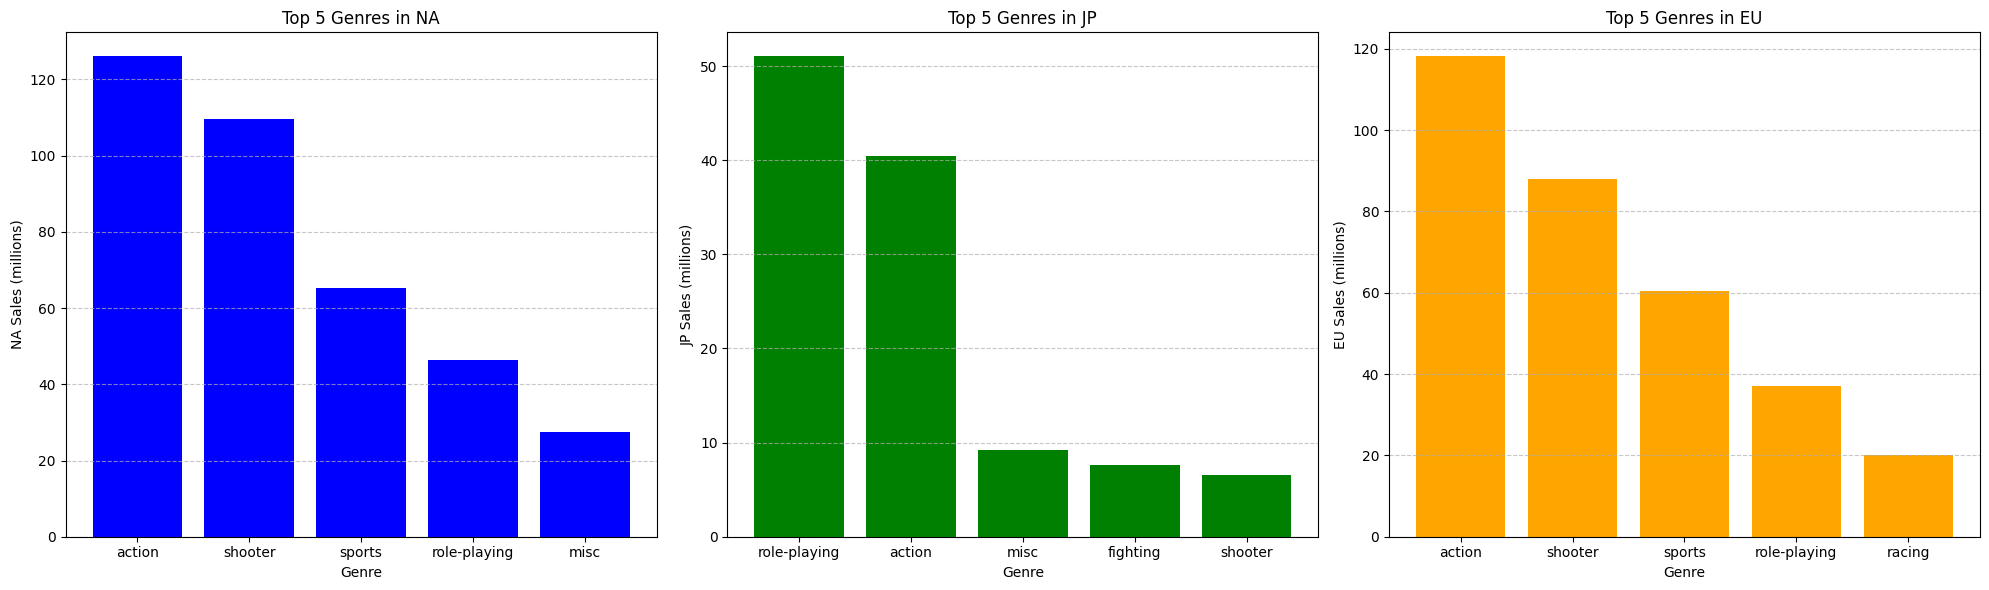

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].bar(top_5_na['genre'], top_5_na['na_sales'], color='blue')
axes[0].set_title('Top 5 Genres in NA')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('NA Sales (millions)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(top_5_jp['genre'], top_5_jp['jp_sales'], color='green')
axes[1].set_title('Top 5 Genres in JP')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('JP Sales (millions)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[2].bar(top_5_eu['genre'], top_5_eu['eu_sales'], color='orange')
axes[2].set_title('Top 5 Genres in EU')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('EU Sales (millions)')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


We can see that games rated e are most popular in all regions, likely because they are available to everyone whereas other more restrictive ratings like ao or m are only available to people over the ages of 18 and 17 respectively. Ec is the least popular, likely because games rated ec often only appeal to "early childhood" demographic making them very restrictive and less popular among other age groups. While the overall sales differ between regions there is not much difference in which ratings are more or less popular as these statistics are largely the same across all regions. 

In [ ]:
filtered_games['rating'] = filtered_games['rating'].fillna('u')

rating_region_sales = filtered_games.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales']].sum().reset_index()

print(rating_region_sales)

print('\n')

print(filtered_games['rating'].unique())



  rating  na_sales  jp_sales  eu_sales
0      e     79.05     15.14     83.36
1   e10+     54.24      5.89     42.69
2      m    165.21     14.11    145.32
3      t     49.79     20.59     41.95
4      u     89.42     85.05     78.91


['m' 'u' 'e' 't' 'e10+']


/tmp/ipykernel_50/3224852755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['rating'] = filtered_games['rating'].fillna('u')


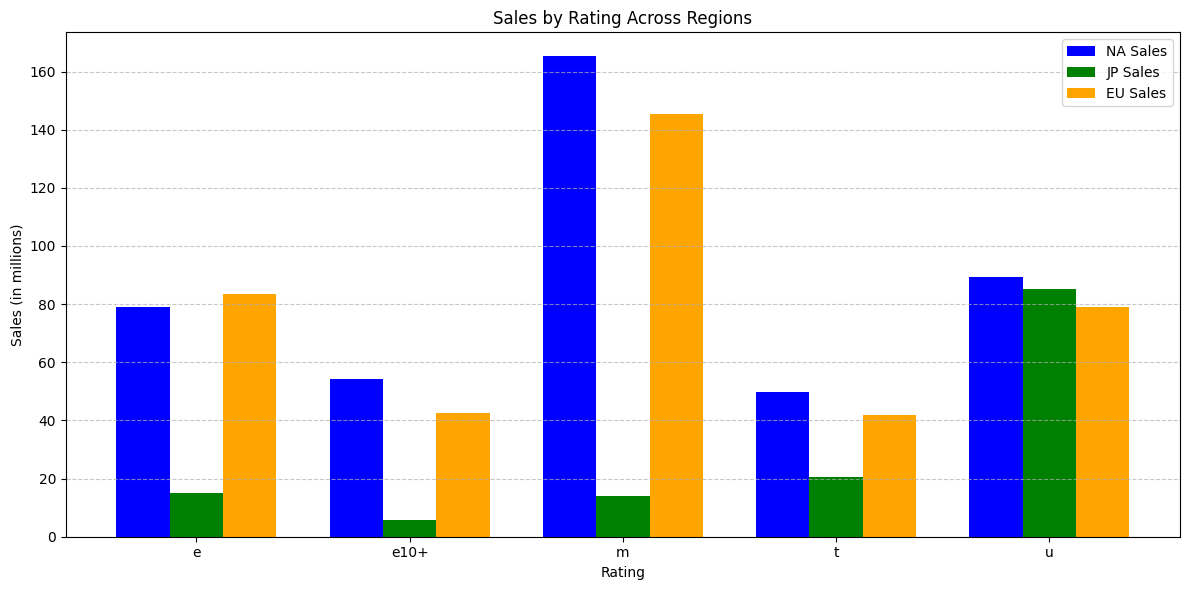

In [ ]:
x = np.arange(len(rating_region_sales['rating']))
width = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x - width, rating_region_sales['na_sales'], width, label='NA Sales', color='blue')
plt.bar(x, rating_region_sales['jp_sales'], width, label='JP Sales', color='green')
plt.bar(x + width, rating_region_sales['eu_sales'], width, label='EU Sales', color='orange')

plt.xlabel('Rating')
plt.ylabel('Sales (in millions)')
plt.title('Sales by Rating Across Regions')
plt.xticks(x, rating_region_sales['rating'])

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

H0: The average user ratings are not different between xbox one games and pc games

H1: The average user ratings are different between xbox one gaes and pc games 

In [ ]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games = games.dropna(subset=['user_score'])

xone_scores = games[games['platform'] == 'xone']['user_score']
pc_scores = games[games['platform'] == 'pc']['user_score']

if xone_scores.empty or pc_scores.empty:
    print("No valid user scores available for XOne or PC.")
    ttest_results_df = pd.DataFrame({"Error": ["No valid data for t-test."]})
else:
    xone_avg = xone_scores.mean()
    pc_avg = pc_scores.mean()

    t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)  # Welch’s t-test

    ttest_results = {
        "Platform": ["XOne", "PC"],
        "Average User Score": [xone_avg, pc_avg],
        "T-Statistic": [t_stat, t_stat],
        "P-Value": [p_value, p_value],
        "Null Hypothesis": ["The average user ratings on XOne and PC are the same."],
        "Conclusion": ["Reject Null Hypothesis" if p_value < 0.05 else "Fail to Reject Null Hypothesis"]
    }



print(ttest_results)

{'Platform': ['XOne', 'PC'], 'Average User Score': [6.521428571428572, 7.062467532467533], 'T-Statistic': [-4.653422798410771, -4.653422798410771], 'P-Value': [4.935072360183574e-06, 4.935072360183574e-06], 'Null Hypothesis': ['The average user ratings on XOne and PC are the same.'], 'Conclusion': ['Reject Null Hypothesis']}


H0: Average user scores for action games are not different from sports games 

H1: Average user score for action games are different from sports games 

In [ ]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games = games.dropna(subset=['user_score'])

action_scores = games[games['genre'] == 'action']['user_score']
sports_scores = games[games['genre'] == 'sports']['user_score']

if action_scores.empty or sports_scores.empty:
    print("No valid user scores available for Action or Sports genres.")
    ttest_results_df = pd.DataFrame({"Error": ["No valid data for t-test."]})
else:
    
    action_avg = action_scores.mean()
    sports_avg = sports_scores.mean()

    t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False) 

    genre_ttest_results = {
        "Genre": ["Action", "Sports"],
        "Average User Score": [action_avg, sports_avg],
        "T-Statistic": [t_stat, t_stat],
        "P-Value": [p_value, p_value],
        "Null Hypothesis": ["The average user scores for Action and Sports genres are the same."],
        "Conclusion": ["Reject Null Hypothesis" if p_value < 0.01 else "Fail to Reject Null Hypothesis"]
    }

    
print(genre_ttest_results)

{'Genre': ['Action', 'Sports'], 'Average User Score': [7.054043715846995, 6.961196736174069], 'T-Statistic': [1.57746791633354, 1.57746791633354], 'P-Value': [0.11483818791498286, 0.11483818791498286], 'Null Hypothesis': ['The average user scores for Action and Sports genres are the same.'], 'Conclusion': ['Fail to Reject Null Hypothesis']}


# Conclusions

    We uncovered many insights by analyzing the games dataset. We found that the period from 2000 to 2010 was the most lucrative period in gaming. We found that ps2 was the most lucrative platform of all time, with the highest total sales accross all of its gaming titles, with 2004 being its best year. 
    
    We also found that both critic scores and user scores had a positive correlation with sales accross all regions. We found that europe and north america had similar patterns in top genres and platforms, with action and ps2 respectively holding the top spots, while japanese customers had slightly differnt preferences, resulting in ds and role playing games being slightly more popular there. 
    
    We tested the null hypothesis that average user ratings are not different between xbox one games and pc games, and ultimately were able to reject this null hypothesis in favor of an alternative hypothesis that they were in fact different. We also tested the null hypohtesis that user scores of action games and sports games were not different, and we were not able to reject this null hypotehsis. 